# Project Case Scenario -- Boston Housing Data

## Data Scientist:  Phil Myers

### Load the Boston Housing Data

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
boston_csv = 'https://raw.githubusercontent.com/partyfil/Testrepo/main/boston_housing.csv'
boston_df = pd.read_csv(boston_csv)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Descriptive Statistics

### Boxplot of Median Value of Owner-occupied Homes (MEDV)

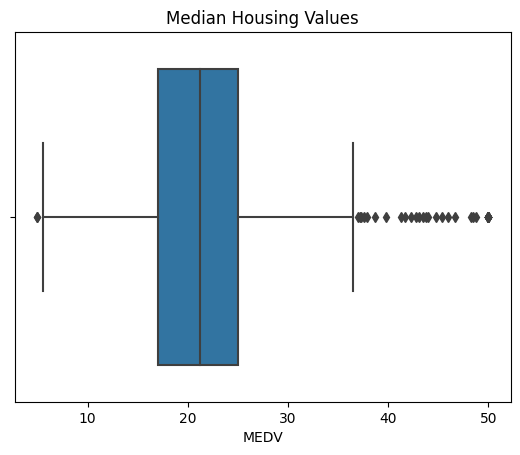

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x = 'MEDV', data = boston_df).set(title = 'Median Housing Values')
plt.show()

__Boxplot: Median housing value is roughly 22k with 50% of the data between roughly 17k to 25k. Nearly 100% of the data is between 4k and 38k with multiple outliers above 38k.__

### Bar Plot of Charles River Bounded Variable (CHAS) (1.0 if tract bounds river, 0.0 otherwise) 

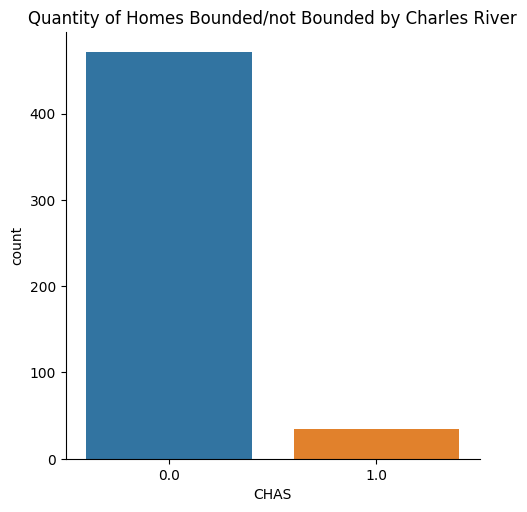

In [49]:
sns.catplot(x = 'CHAS', kind = 'count' , 
            data = boston_df).set(title = 'Quantity of Homes Bounded/not Bounded by Charles River')
plt.show()

__Bar Chart: There are a lot more (471) houses not bounded by the Charles River than that are bounded (35)__

#### Alternate Code

In [24]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

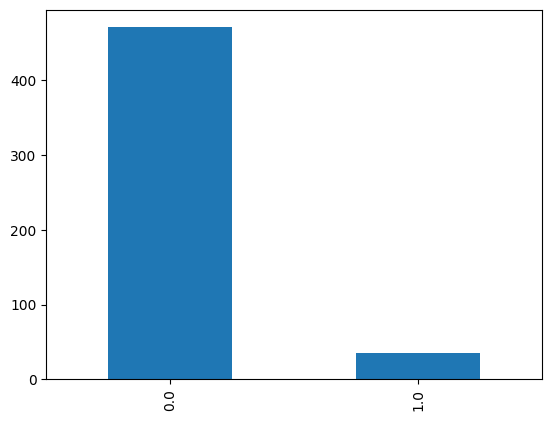

In [23]:
boston_df.CHAS.value_counts().plot(kind = 'bar')
plt.show()

### Boxplot of Median Home Value (MEDV) vs Age Groups

In [6]:
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = 'Over 70'
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'Under 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70'

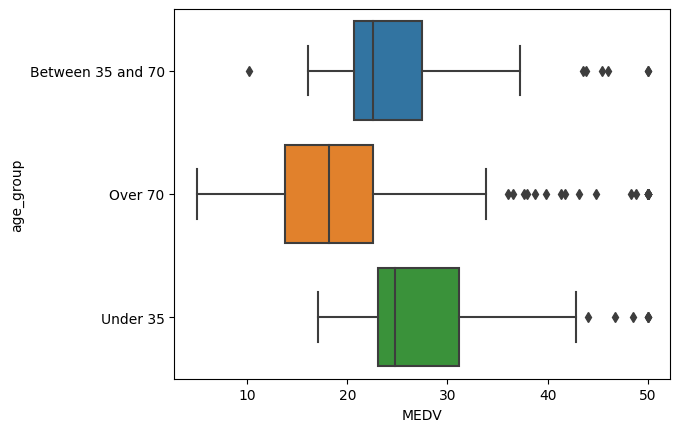

In [19]:
sns.boxplot(x = 'MEDV', y = 'age_group', data = boston_df)
plt.show()

__Box Plot: Houses over 70 years have less value in general than houses between 35 and 70 years old. Houses under 35 years are generally at a higher value.__

### Scatter Plot for Relationship between Nitric Oxide Concentrations (NOX) and Proportion of Non-retail Business Acres (INDUS)

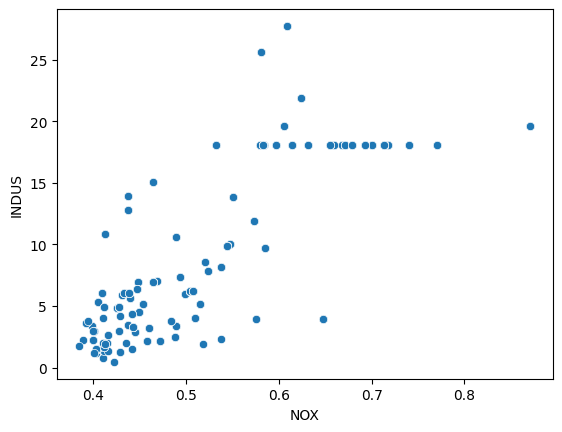

In [31]:
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.show()

__Scatter Plot: There appears to be a relationship between Nitric Oxide levels and proportions of industrial land. Higher levels of Nitric Oxide appear to correlate to a higher proportion of industrial land.__

### Histogram of Pupil to Teacher Ratio (PTRATIO)

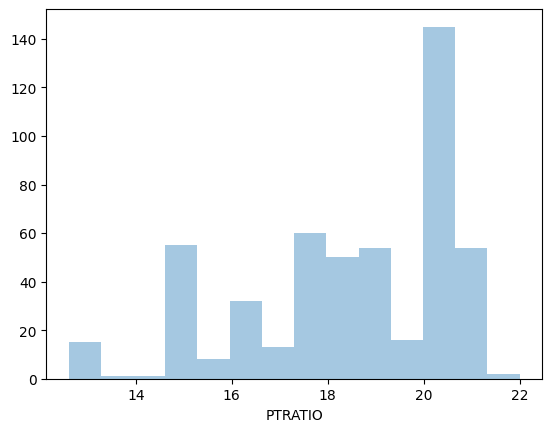

In [30]:
sns.distplot(boston_df["PTRATIO"], kde = False)
plt.show()

__Histogram: Most classrooms have a 20:1 pupil to teacher ratio and all are less then 22:1.__

## Statistical Analysis

### T-test

Is there a significant difference in median value of houses bounded by the Charles River or not?

Null Hypothesis (H0) : No difference in median housing values (Bounding by the Charles River has no effect on median housing value) <br>
Alternate Hypothesis (H1) :  Difference in median housing values

Significance Level (Alpha) = 0.05

In [32]:
import numpy as np
import scipy.stats

#### Test for Variance 

In [33]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], 
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], 
                   center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since p-value is less than 0.05, there is a significant difference in variance.

In [34]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1.0]['MEDV'], 
                      equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#### T-test Results

__Since the p-value is less than 0.05, we reject the null hypothesis. The Charles River bounding does effect the housing median value__

***

### ANOVA

Is there a difference in Median values of houses for each proportion of owner ocupied units built prior to 1940?

Null Hypothesis (H0) : No difference in median housing values by age group <br>
Alternate Hypothesis (H1) : Difference in median housing values by age group

Significance Level (Alpha) = 0.05

#### Test for Variance 

In [35]:
scipy.stats.levene(boston_df[boston_df['age_group'] == 'Over 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'Under 35']['MEDV'], 
                   boston_df[boston_df['age_group'] == 'Between 35 and 70']['MEDV'], 
                   center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since p-value is greater than 0.05, there is no significant difference in variance.

In [36]:
Under_thirty_five = boston_df[boston_df['age_group'] == 'Under 35']['MEDV']
Between_thirty_five_seventy = boston_df[boston_df['age_group'] == 'Between 35 and 70']['MEDV']
Over_seventy = boston_df[boston_df['age_group'] == 'Over 70']['MEDV']

scipy.stats.f_oneway(Under_thirty_five, Between_thirty_five_seventy, Over_seventy)
                              

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

#### ANOVA Results

__Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in at least one group in the mean Median Housing Values (MEDV) by age group.__

***

### Pearson Correlation

Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)?

Null Hypothesis (H0) : No significant relationship between NOX and INDUS <br>
Alternate Hypothesis (H1) : Significant relationship between NOX and INDUS

Significance Level (Alpha) = 0.05


In [37]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061238693e-98)

#### Pearson Correlation Result

__Since the p-value is less than 0.05, there is a significant relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town.__

***

### Regression Analysis

What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner occupied homes?

Null Hypothesis (H0) : No significant relationship between weighted distance (DIS) and median housing value (MEDV) <br>
Alternate Hypothesis (H1) : Significant relationship between DIS and MEDV

Significance Level (Alpha) = 0.05


#### Install statsmodels

In [42]:
!pip install statsmodels
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 4.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [43]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        12:06:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Regression Result

__Since the p-value for the DIS variable is less than 0.05, there is a significant relationship between the distance from city centers and median housing values. MEDV can be modeled by the equation = 18.39 + 1.0916*DIS__

***